# Robust Varibad Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

/tmp/ipykernel_1826980/867683384.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Configuration

In [2]:
ENV_NAME = 'HalfCheetahMass-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'hcm'
TASKS = ('mass',)
METHODS = ('varibad', 'cembad', 'cesbad', 'oracbad', 'cvrbad', 'cvrsbad')[:3]
BEST = False
SEEDS = list(range(10))
ALPHA = 0.05
FINISHED = True

CEM-related configuration:

In [3]:
TRANSFORMATION = lambda x: 2 ** (2*(x-0.5))
YLIM = (0, 2)
SMOOTH = 20

## Load results

In [4]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, align_progress=not FINISHED)
dd

hcm_varibad_0__23:10_14:38:42
hcm_varibad_1__23:10_21:45:27
hcm_varibad_2__24:10_04:50:44
hcm_varibad_3__24:10_11:57:58
hcm_varibad_4__24:10_20:24:14
hcm_varibad_5__25:10_04:54:18
hcm_varibad_6__25:10_13:23:16
hcm_varibad_7__25:10_21:53:27
hcm_varibad_8__26:10_06:20:12
hcm_varibad_9__26:10_12:02:25
hcm_cembad_0__23:10_14:39:10
hcm_cembad_1__23:10_21:52:15
hcm_cembad_2__24:10_05:04:04
hcm_cembad_3__24:10_12:17:55
hcm_cembad_4__24:10_20:52:45
hcm_cembad_5__25:10_05:29:00
hcm_cembad_6__25:10_14:03:19
hcm_cembad_7__25:10_22:40:27
hcm_cembad_8__26:10_07:10:07
hcm_cembad_9__26:10_12:40:41
hcm_cesbad_0__23:10_14:39:20
hcm_cesbad_1__23:10_21:49:32
hcm_cesbad_2__24:10_04:58:20
hcm_cesbad_3__24:10_12:09:55
hcm_cesbad_4__24:10_20:42:03
hcm_cesbad_5__25:10_05:15:34
hcm_cesbad_6__25:10_13:48:13
hcm_cesbad_7__25:10_22:22:49
hcm_cesbad_8__26:10_06:51:10
hcm_cesbad_9__26:10_12:25:49
Task-space dimension: 1
Validation points: 188
CPU times: user 1min 20s, sys: 664 ms, total: 1min 20s
Wall time: 1min 20

,iter,task_id,ep,ret,task0,method,seed
0,-1,0,0,-57.952648,0.569572,varibad,0
1,-1,0,1,-69.134789,0.569572,varibad,0
2,-1,1,0,-20.631250,0.732335,varibad,0
3,-1,1,1,-11.206697,0.732335,varibad,0
4,-1,2,0,-34.675880,0.928469,varibad,0
...,...,...,...,...,...,...,...
180475,4674,13,1,1585.630493,1.627266,cesbad,9
180476,4674,14,0,1981.195068,0.677210,cesbad,9
180477,4674,14,1,2040.063843,0.677210,cesbad,9
180478,4674,15,0,1718.801758,0.707922,cesbad,9


In [5]:
%%time
rr, rra, rrm, rrc, rr0, rra0 = 6 * [None]
if FINISHED:
    rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
        ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, 'best' if BEST else 'final')
rr

Test tasks: 1008
CPU times: user 24.5 s, sys: 120 ms, total: 24.6 s
Wall time: 24.6 s


,ep,ret,task0,method,seed
0,0,1634.000854,1.018702,varibad,0
1,1,1574.353516,1.018702,varibad,0
2,0,2013.830688,0.696772,varibad,0
3,1,1954.411499,0.696772,varibad,0
4,0,1500.417969,1.376953,varibad,0
...,...,...,...,...,...
60475,1,1838.750488,0.980774,cesbad,9
60476,0,1589.948242,1.560205,cesbad,9
60477,1,1519.284424,1.560205,cesbad,9
60478,0,1710.476440,0.665142,cesbad,9


## Analysis

### Tasks

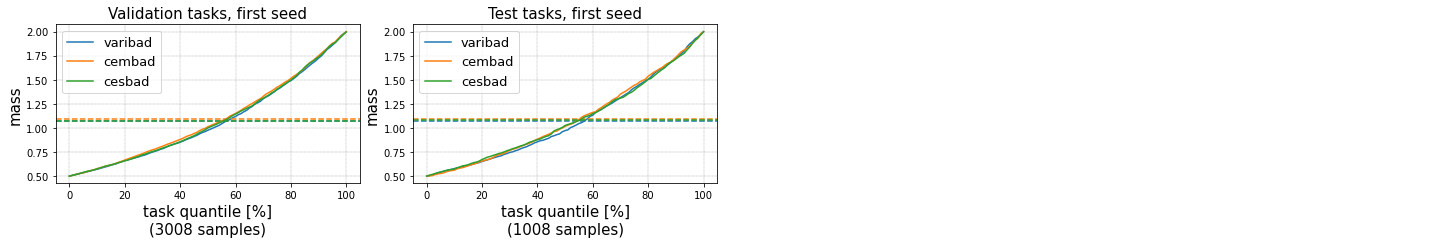

In [6]:
axs = analysis.show_task_distribution(dda0, rra0, TASKS)

Validation returns vs. task - over all seeds aggregated:
CPU times: user 3.73 s, sys: 0 ns, total: 3.73 s
Wall time: 3.72 s


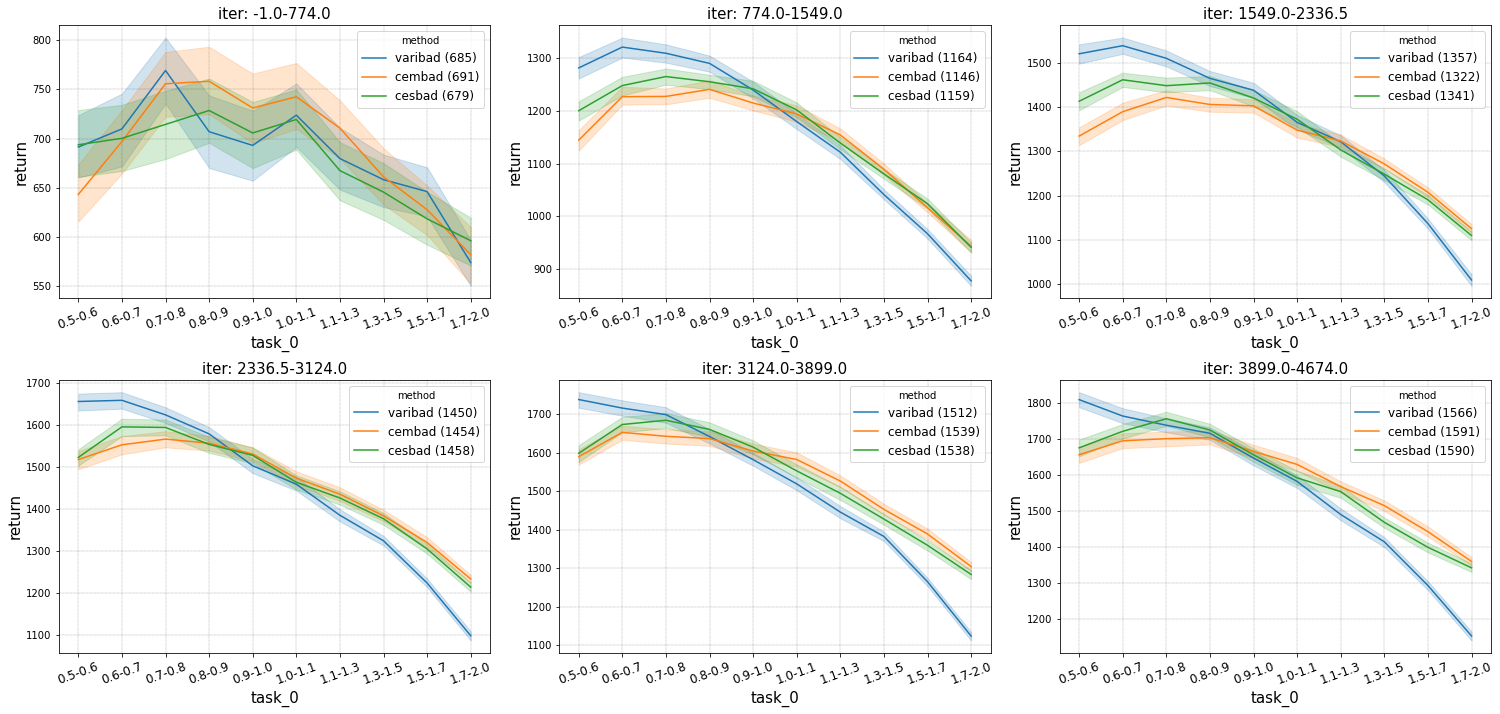

In [7]:
%%time
axs = analysis.show_validation_vs_tasks(dda)

Test returns vs. task - over all seeds aggregated:
CPU times: user 1.14 s, sys: 8.08 ms, total: 1.15 s
Wall time: 1.14 s


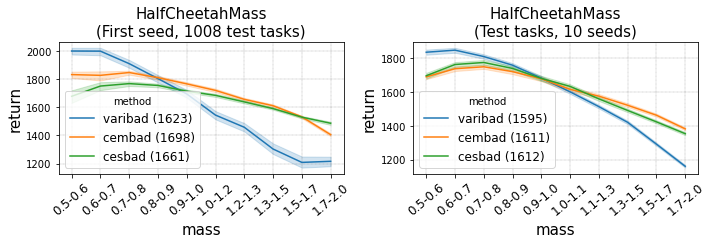

In [8]:
%%time
if FINISHED:
    axs = analysis.show_test_vs_tasks(rra, rra0, TITLE, TASKS)

### The CEM: first seed

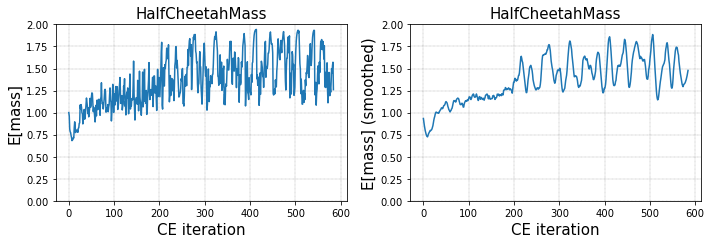

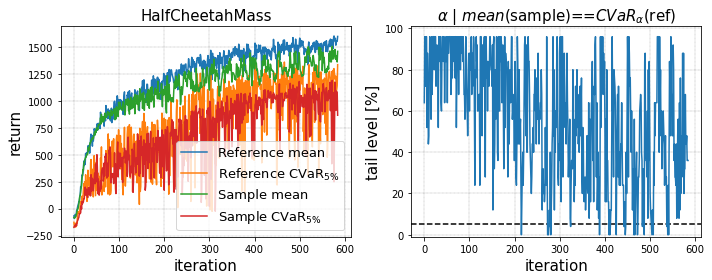

In [32]:
ce, c1, c2, axs = analysis.cem_analysis(
    ENV_NAME, task_dim, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=0)

### Validation results

CPU times: user 179 ms, sys: 26 µs, total: 179 ms
Wall time: 177 ms


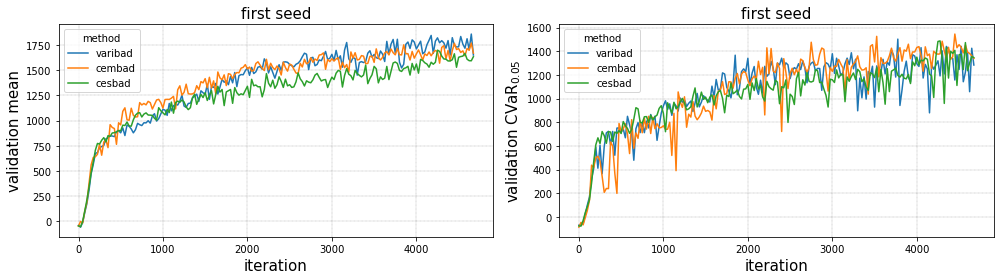

In [10]:
%%time
axs = analysis.show_validation_results(dda0, ALPHA)

CPU times: user 209 ms, sys: 3.97 ms, total: 213 ms
Wall time: 212 ms


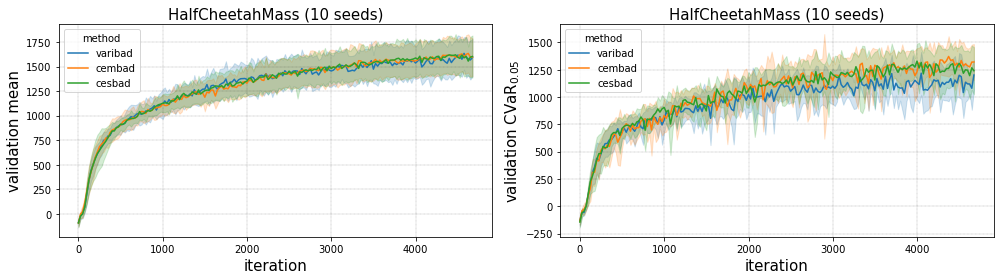

In [11]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

### Test results

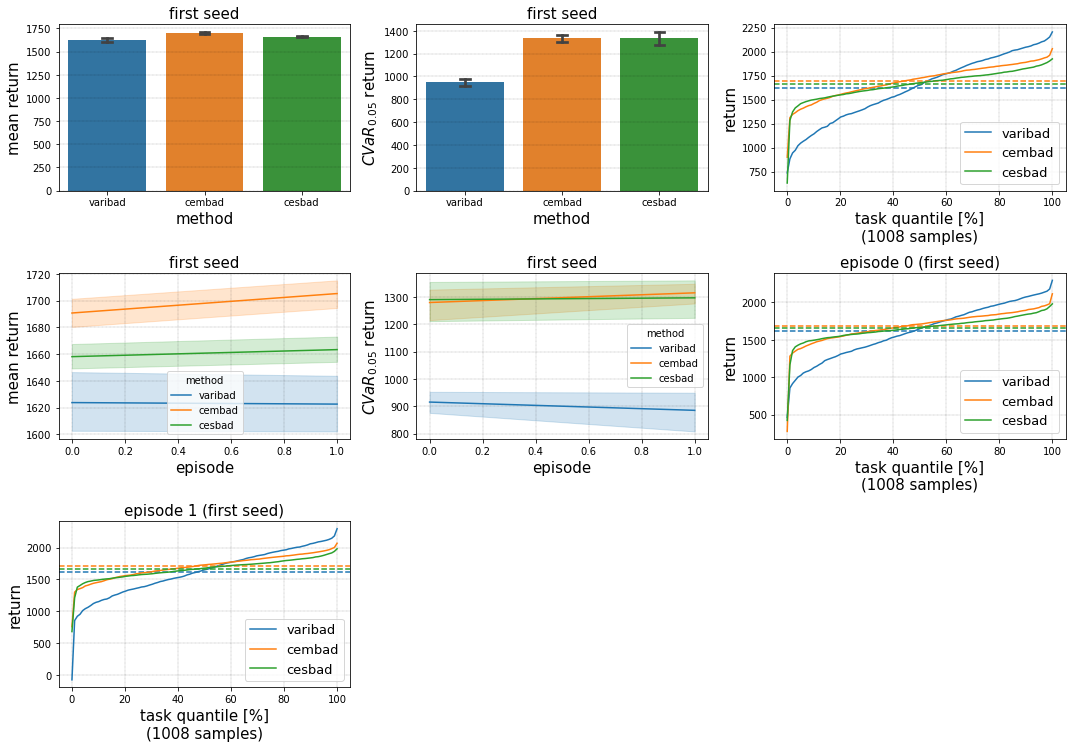

In [12]:
if FINISHED:
    axs = analysis.summarize_test(rra0, rr0, ALPHA)

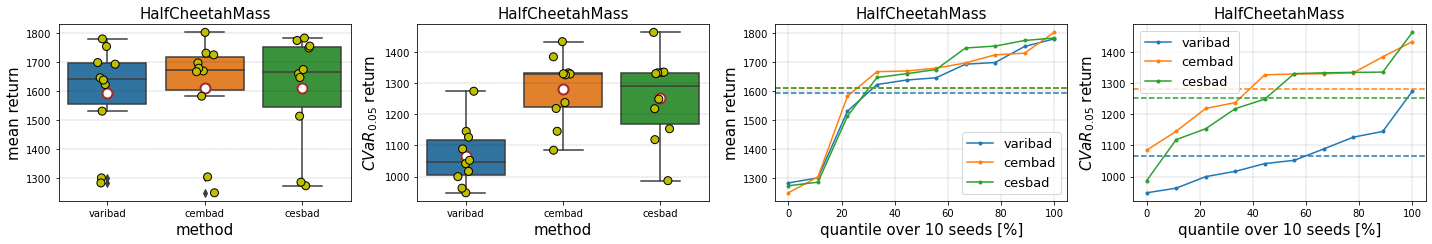

In [13]:
if FINISHED:
    axs = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE)

(900.0, 1410.4072300733676)

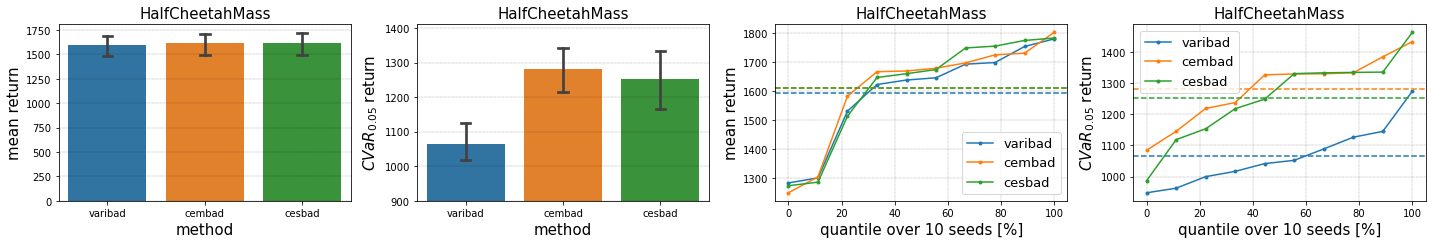

In [21]:
axs = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE, barplot=True)
axs[1].set_ylim((900, None))

In [22]:
# %%time
# if FINISHED:
#     bb, bba, bbm, bbc, bb0, bba0 = analysis.load_test_data(
#         ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, 'best')
#     axs = analysis.summarize_test_over_seeds(bbm, bbc, ALPHA, TITLE)
#     axs2 = analysis.show_test_vs_tasks(bba, bba0, TITLE, TASKS)

In [18]:
rrc

,ret,method,seed
0,948.024784,varibad,0
1,1145.115948,varibad,1
2,1274.059630,varibad,2
3,1041.725756,varibad,3
4,1126.497277,varibad,4
5,1052.216257,varibad,5
6,1016.768895,varibad,6
7,962.834696,varibad,7
8,999.852945,varibad,8
9,1088.803395,varibad,9
